In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "data/lem"
year = "2010_2019"
category = "all"
file_name = year+"_"+category#+"_no_names_beletrie"
file_path = path+"/"+file_name + ".txt"
chunk = 2000
divide = "chunk"
df_path = "../../data/books_info_topic_distance_born_died_"

### LOAD BOOKS

In [3]:
def load_books_from_document(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    books = []
    books_info = []
    start_tag = '<doc title="'
    end_tag = '</doc>'
    start_index = 0

    while True:
        book_start = content.find(start_tag, start_index)
        if book_start == -1:
            break

        book_end = content.find(end_tag, book_start)
        if book_end == -1:
            break

        book_text = content[book_start:book_end + len(end_tag)]
        book_info = book_text.strip()[5:book_text.index('>') + 1]  # Remove '<doc' and '</doc>'  # Remove '<doc' and '</doc>'

        book_info_list = book_info.split('" ')
        book_info_dict = {}

        for item in book_info_list:
            key, value = item.split('=')
            book_info_dict[key.strip()] = value.strip('"')

        book_content = book_text[book_text.index('>') + 1:-len(end_tag)].strip()        
        books.append(book_content)

        books_info.append(book_info_dict)

        start_index = book_end + len(end_tag)

    return books, books_info



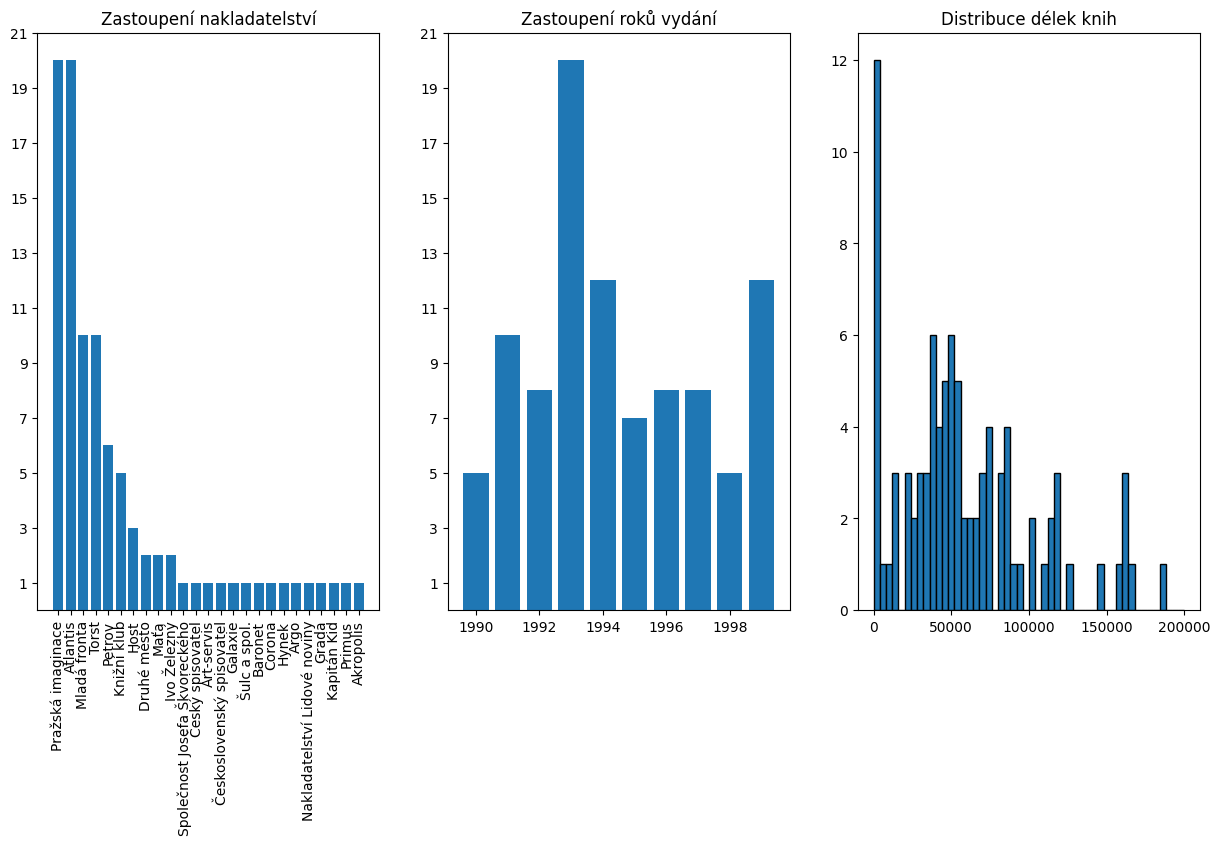

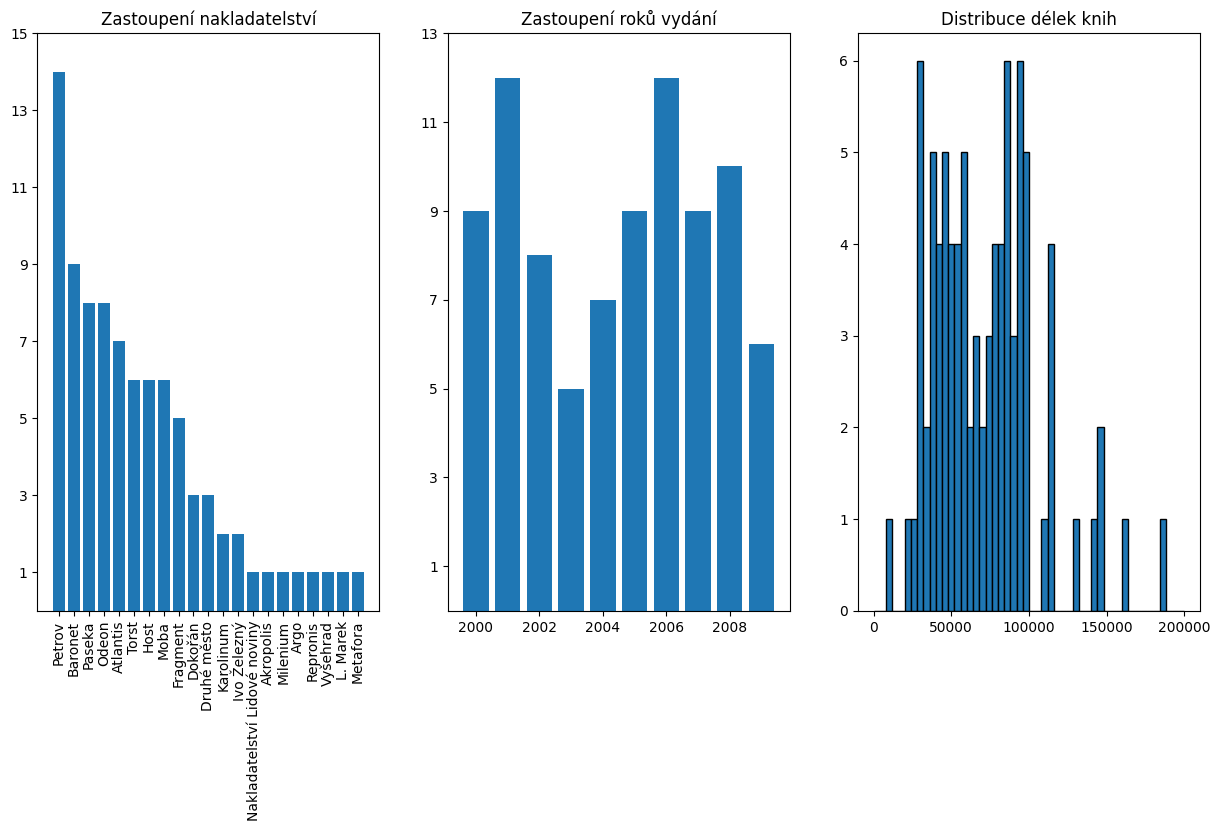

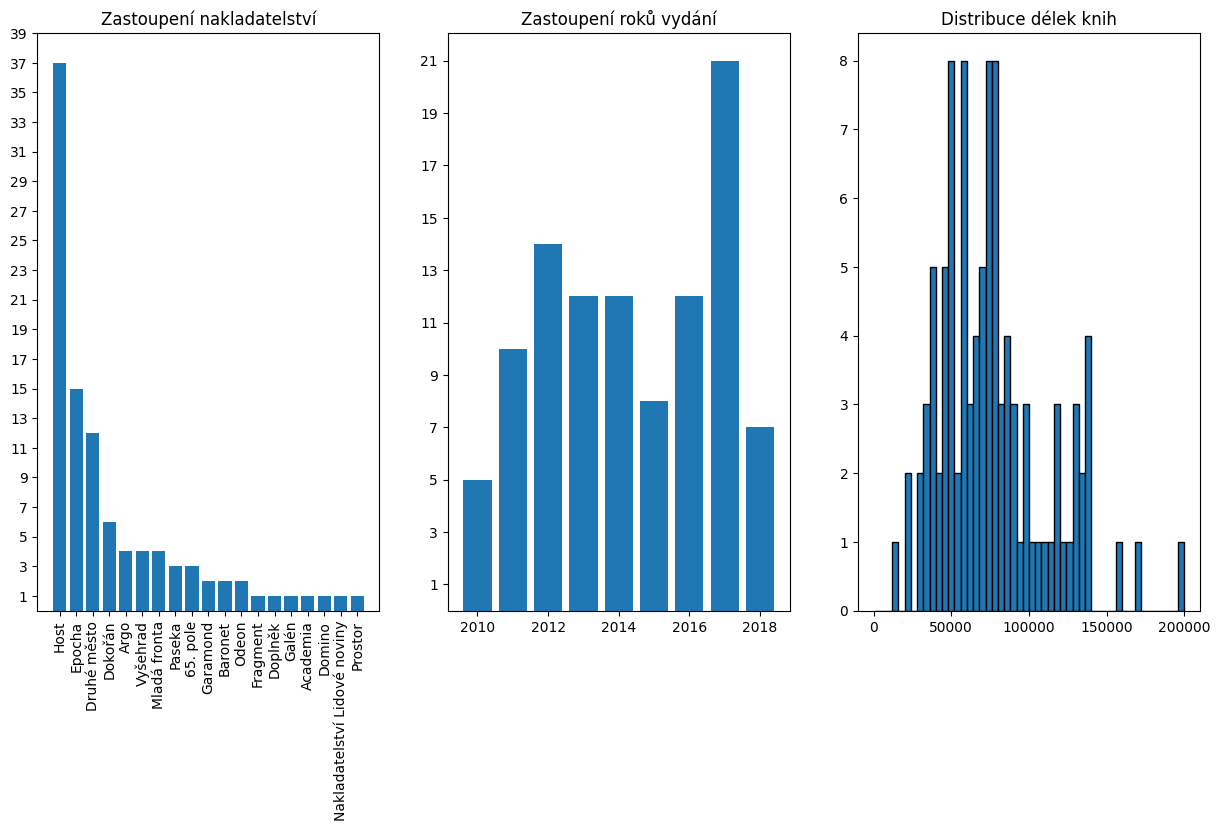

In [18]:
for years in ["1990_1999", "2000_2009", "2010_2019"]:
    
    #
    df = pd.read_excel(df_path + "{y}.xlsx".format(y = years))
    
    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7.5))

    publishers_counts = df['publisher'].value_counts()
    publisher = publishers_counts.index
    counts = publishers_counts.values
    
    ax1.bar(publisher, counts)
    ax1.set_title('Zastoupení nakladatelství')

    
    first_published_counts = df['first_published'].value_counts()[df.first_published.unique()]
    first_published = first_published_counts.index
    fp_counts = first_published_counts.values
    
    
    ax2.bar(first_published, fp_counts)
    ax2.set_title("Zastoupení roků vydání")
    
    # Load books 
    file_name = years+"_"+category#+"_no_names_beletrie"
    file_path = path+"/"+file_name + ".txt"
    books, books_info = load_books_from_document(file_path)
    books_tokens = list(map(lambda x: len(x.split()), books))

    ax3.hist(books_tokens, bins=50, edgecolor='black', range = [0, 200000])
    ax3.set_title('Distribuce délek knih')    
    
    plt.sca(ax1)
    yint = range(1, df['publisher'].value_counts()[0]+3, 2)
    plt.yticks(yint)
    plt.xticks(rotation=90)
    
    plt.sca(ax2)
    yint = range(1, max(fp_counts)+2, 2)
    plt.yticks(yint)
    
    plt.savefig('../../plots/knihy_{years}'.format(years = years))


Text(0, 0.5, 'Počet tokenů')

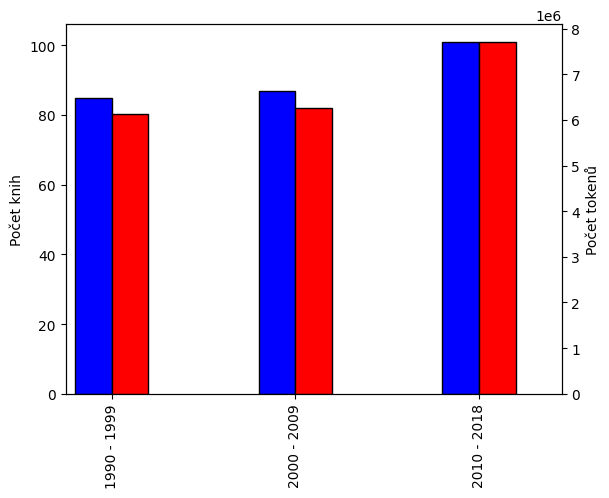

In [ ]:
number_of_books = {'1990 - 1999' : [85,6123484] ,
                   '2000 - 2009' : [87, 6255262], 
                   '2010 - 2018' : [101, 7711034]}
tokens_of_books = {'1990 - 1999' : 6123484,
                   '2000 - 2009' : 6255262, 
                   '2010 - 2018' : 7711034}


h = pd.DataFrame.from_dict(number_of_books, orient='index')

h.columns = ['books', 'tokens']
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

h.books.plot(kind = 'bar',  color = 'blue', edgecolor='black',ax=ax, width=width, position=1)
h.tokens.plot(kind = 'bar',  color = 'red', edgecolor='black',ax=ax2, width=width, position=0)
plt.xticks(rotation = 50)

ax.set_ylabel('Počet knih')
ax2.set_ylabel('Počet tokenů')
